In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.1.1
Uninstalling scikit-learn-1.1.1:
  Successfully uninstalled scikit-learn-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn 

  Using cached scikit_learn-1.1.1-cp38-cp38-macosx_10_13_x86_64.whl (8.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score,adjusted_rand_score,rand_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import copy

# DATA PREPROCESSING

In [5]:
data = pd.read_csv('pca_skills.csv')
data2 = pd.read_csv('encoded_skills_data.csv')
data3 = pd.read_csv('final_till_12_03.csv')

In [6]:
data3.head()

,Unnamed: 0,Unnamed: 0.1,roles,companies,locations,experience,skills,skill index
0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'data science', 'python', 'it skills', 'artifi...",-1.0
1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'it skills', 'python', 'machine learning'",-1.0
2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'artificial intelligence', 'data science', 'it...",-1.0
3,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0
4,5,5,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0


In [7]:
data2.head()

,Unnamed: 0,python,machine learning,it skills,data science,computer science,artificial intelligence,r,java,sql,big data
0,0,1,0,1,1,0,1,1,0,0,1
1,1,1,1,1,0,0,0,0,0,0,0
2,2,1,1,1,1,0,1,0,0,0,0
3,3,1,1,1,1,0,1,0,0,0,0
4,4,1,1,1,1,0,1,0,0,0,0


In [8]:
data.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,0.998025,-0.102651,0.761568,0.396486,0.911977,0.713331,0.757557,-0.049060,-0.164950,-0.262696
1,1,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
2,2,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
3,3,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
4,4,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128


In [9]:
x = data.iloc[:,1:]
encoded_data = data2.iloc[:,1:]
Y=encoded_data.to_numpy()

In [10]:
a=Y[0,:]
a


array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [11]:
b=Y[1,:]
b

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

<AxesSubplot:>

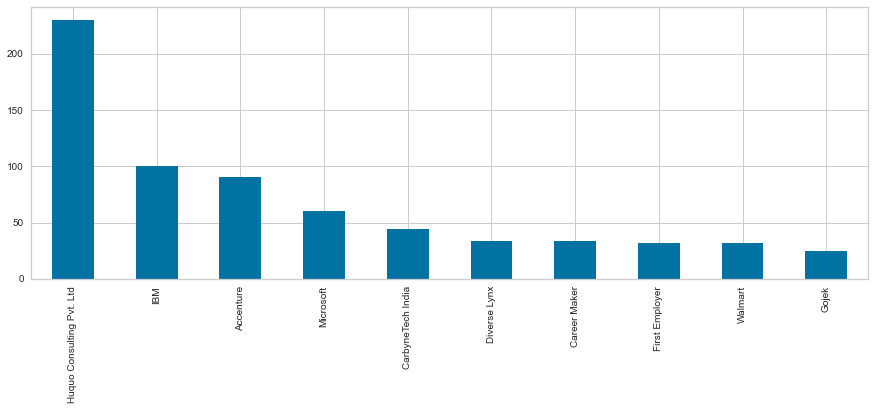

In [12]:
f,ax=plt.subplots(figsize=(15,5))
data3['companies'].value_counts().head(10).plot(kind = 'bar')

In [13]:
encoded_data.head()

,python,machine learning,it skills,data science,computer science,artificial intelligence,r,java,sql,big data
0,1,0,1,1,0,1,1,0,0,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,0,1,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0


In [14]:
encoded_data.mean()

python                     0.502063
machine learning           0.697267
it skills                  0.324910
data science               0.495874
computer science           0.178958
artificial intelligence    0.145694
r                          0.128417
java                       0.109077
sql                        0.113976
big data                   0.124549
dtype: float64

# Principal component analysis

In [15]:
pca = PCA(n_components=10)
print(pca)
x_pca = pca.fit_transform(encoded_data)
new_col = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
x_pca_pd = pd.DataFrame(data = x_pca, columns = new_col)
x_pca_pd

PCA(n_components=10)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.998025,-0.102651,0.761568,0.396486,0.911977,0.713331,0.757557,-0.049060,-0.164950,-0.262696
1,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
2,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
3,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
4,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
...,...,...,...,...,...,...,...,...,...,...
3873,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
3874,0.907684,-0.369313,-0.106853,-0.057775,-0.200512,-0.107448,-0.260297,-0.101614,-0.168712,-0.162147
3875,0.298083,-0.332626,0.157407,-0.492719,-0.324241,-0.023560,-0.205548,0.313327,0.243072,-0.192883
3876,-0.071839,0.824042,0.449002,0.025288,-0.027396,-0.109686,-0.241775,0.155340,0.206675,-0.413756


In [16]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = encoded_data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
python,0.674066,0.367058,0.108167,-0.211277,-0.237633,0.276762,-0.155087,0.298563,0.248480,-0.215787
machine learning,0.114402,-0.335711,-0.752470,-0.498959,-0.132286,0.011878,0.102683,0.111507,-0.002915,0.135693
it skills,0.609601,-0.036687,-0.264260,0.434944,0.123729,-0.083888,-0.054749,-0.414942,-0.411785,0.030736
data science,0.255520,-0.820957,0.460875,-0.019049,-0.164559,0.074248,-0.066456,0.046481,0.039312,0.085179
computer science,-0.216674,-0.064220,-0.247900,0.506279,-0.464039,0.628383,0.024323,-0.029752,0.139028,0.012371
artificial intelligence,-0.001671,-0.091594,-0.045006,-0.073267,0.760644,0.586547,-0.220159,0.034129,0.067545,0.086019
r,0.079577,0.087531,0.201528,-0.304292,-0.009680,0.299896,0.710482,-0.507723,0.011843,-0.007750
java,0.161430,0.083359,-0.034246,0.177917,0.072815,-0.203345,0.067239,-0.103045,0.649735,0.670984
sql,-0.014597,0.214249,0.181486,-0.141886,-0.178282,0.193983,-0.049527,0.216874,-0.561054,0.683470


In [17]:
x_pca[:,0]

array([ 0.99802505,  0.6521636 ,  0.90601273, ...,  0.29808296,
       -0.07183873,  0.36045389])

In [18]:
x_pca[:,1]

array([-0.10265082,  0.45164419, -0.46090742, ..., -0.33262611,
        0.82404208, -0.8013564 ])

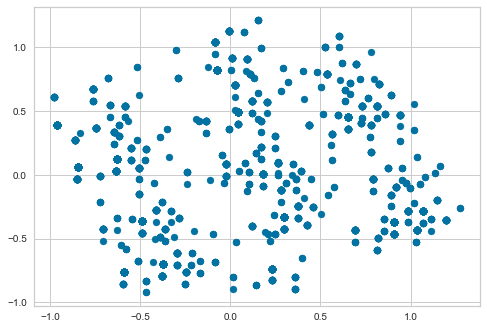

In [19]:
plt.scatter(x_pca[:,0],x_pca[:,1])

In [20]:
experience_split = data3['experience'].str[0:-1].str.split('-', expand=True)
experience_split.head()

,0,1
0,5,10
1,3,8
2,3,5
3,8,13
4,8,13


In [21]:
experience_split[1] =  experience_split[1].str.strip()
experience_split[1] = experience_split[1].str.replace('yr', '')
experience_split[1] = experience_split[1].str.replace(r'yr', '')
experience_split[1].head()

0    10
1     8
2     5
3    13
4    13
Name: 1, dtype: object

In [22]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')

In [23]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)
experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

,min_experience,max_experience
0,5,10
1,3,8
2,3,5
3,8,13
4,8,13


In [24]:
data4=pd.concat([data3, experience], axis=1, sort=False)
data4.head()

,Unnamed: 0,Unnamed: 0.1,roles,companies,locations,experience,skills,skill index,min_experience,max_experience
0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'data science', 'python', 'it skills', 'artifi...",-1.0,5,10
1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'it skills', 'python', 'machine learning'",-1.0,3,8
2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'artificial intelligence', 'data science', 'it...",-1.0,3,5
3,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13
4,5,5,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13


In [25]:
data4['avg_experience']=(data4['min_experience'].values + data4['max_experience'].values)/2

In [26]:
data4.head()

,Unnamed: 0,Unnamed: 0.1,roles,companies,locations,experience,skills,skill index,min_experience,max_experience,avg_experience
0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'data science', 'python', 'it skills', 'artifi...",-1.0,5,10,7.5
1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'it skills', 'python', 'machine learning'",-1.0,3,8,5.5
2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'artificial intelligence', 'data science', 'it...",-1.0,3,5,4.0
3,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13,10.5
4,5,5,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13,10.5


# Biplot

In [27]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

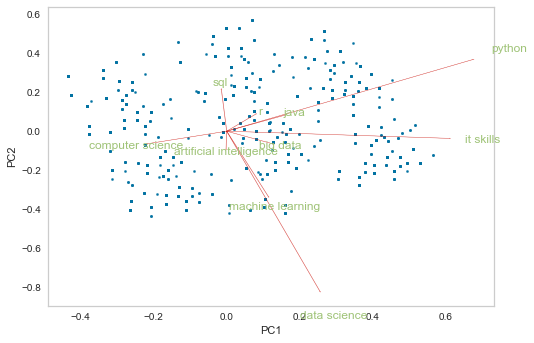

In [28]:
myplot(x_pca[:,0:2],np.transpose(loadings[0:2, :]),list(encoded_data.columns))
plt.show()

# Elbow Method

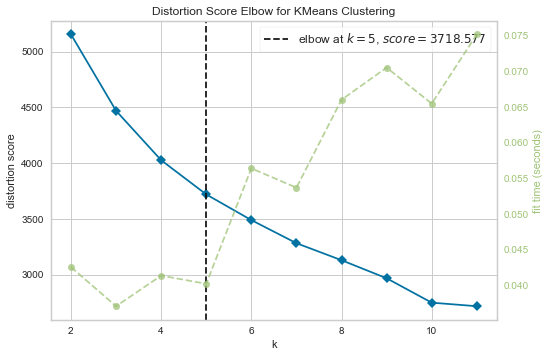

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Clustering

# AgglomerativeClustering

In [30]:
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [31]:
encoded_data

,python,machine learning,it skills,data science,computer science,artificial intelligence,r,java,sql,big data
0,1,0,1,1,0,1,1,0,0,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,0,1,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3873,1,1,1,0,0,0,0,0,0,0
3874,1,1,1,1,0,0,0,0,0,0
3875,1,1,0,1,0,0,0,0,0,0
3876,1,0,0,0,0,0,0,0,0,0


In [32]:
x_pca_pd

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.998025,-0.102651,0.761568,0.396486,0.911977,0.713331,0.757557,-0.049060,-0.164950,-0.262696
1,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
2,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
3,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
4,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
...,...,...,...,...,...,...,...,...,...,...
3873,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
3874,0.907684,-0.369313,-0.106853,-0.057775,-0.200512,-0.107448,-0.260297,-0.101614,-0.168712,-0.162147
3875,0.298083,-0.332626,0.157407,-0.492719,-0.324241,-0.023560,-0.205548,0.313327,0.243072,-0.192883
3876,-0.071839,0.824042,0.449002,0.025288,-0.027396,-0.109686,-0.241775,0.155340,0.206675,-0.413756


In [33]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
python,0.674066,0.367058,0.108167,-0.211277,-0.237633,0.276762,-0.155087,0.298563,0.248480,-0.215787
machine learning,0.114402,-0.335711,-0.752470,-0.498959,-0.132286,0.011878,0.102683,0.111507,-0.002915,0.135693
it skills,0.609601,-0.036687,-0.264260,0.434944,0.123729,-0.083888,-0.054749,-0.414942,-0.411785,0.030736
data science,0.255520,-0.820957,0.460875,-0.019049,-0.164559,0.074248,-0.066456,0.046481,0.039312,0.085179
computer science,-0.216674,-0.064220,-0.247900,0.506279,-0.464039,0.628383,0.024323,-0.029752,0.139028,0.012371
artificial intelligence,-0.001671,-0.091594,-0.045006,-0.073267,0.760644,0.586547,-0.220159,0.034129,0.067545,0.086019
r,0.079577,0.087531,0.201528,-0.304292,-0.009680,0.299896,0.710482,-0.507723,0.011843,-0.007750
java,0.161430,0.083359,-0.034246,0.177917,0.072815,-0.203345,0.067239,-0.103045,0.649735,0.670984
sql,-0.014597,0.214249,0.181486,-0.141886,-0.178282,0.193983,-0.049527,0.216874,-0.561054,0.683470


In [34]:
Y1 = squareform(pdist(encoded_data, 'euclidean'))
print(Y)

[[1 0 1 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 1]]


In [35]:
NY=np.tril(Y1,1)
print(NY)


[[0.         2.23606798 0.         ... 0.         0.         0.        ]
 [2.23606798 0.         1.41421356 ... 0.         0.         0.        ]
 [1.73205081 1.41421356 0.         ... 0.         0.         0.        ]
 ...
 [2.23606798 1.41421356 1.41421356 ... 0.         1.41421356 0.        ]
 [2.23606798 1.41421356 2.         ... 1.41421356 0.         2.23606798]
 [2.         1.73205081 1.73205081 ... 1.73205081 2.23606798 0.        ]]


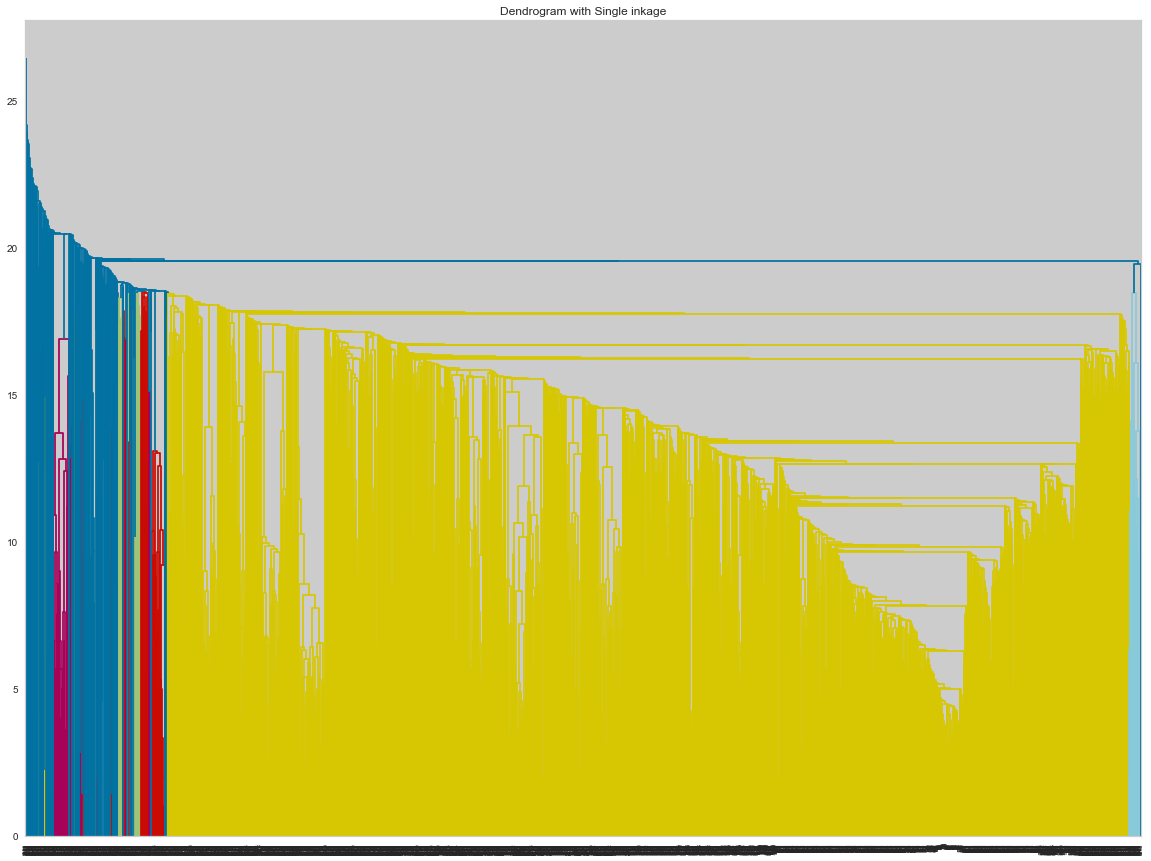

In [36]:
plt.figure(figsize=(20,15))  
plt.title("Dendrogram with Single inkage")  
dend = shc.dendrogram(shc.linkage(NY, method='single'))

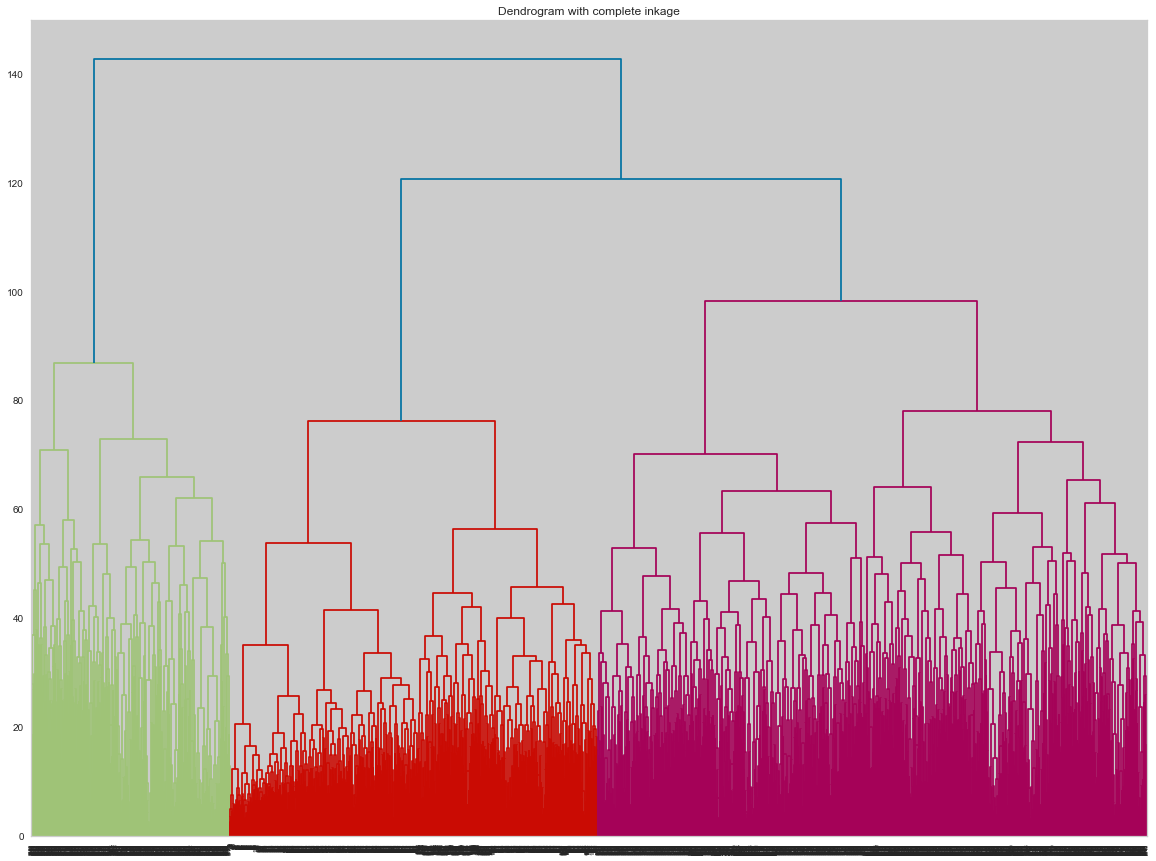

In [37]:
plt.figure(figsize=(20,15))  
plt.title("Dendrogram with complete inkage")  
dend = shc.dendrogram(shc.linkage(NY, method='complete'))

In [38]:
NY.size

15038884

In [39]:
x_pca.size

38780

In [40]:
x_pca

array([[ 0.99802505, -0.10265082,  0.76156763, ..., -0.04905998,
        -0.16495028, -0.26269593],
       [ 0.6521636 ,  0.45164419, -0.5677278 , ..., -0.14809487,
        -0.20802429, -0.24732627],
       [ 0.90601273, -0.46090742, -0.15185951, ..., -0.06748529,
        -0.10116752, -0.07612758],
       ...,
       [ 0.29808296, -0.33262611,  0.15740673, ...,  0.31332742,
         0.24307235, -0.19288308],
       [-0.07183873,  0.82404208,  0.44900205, ...,  0.15533955,
         0.20667503, -0.41375555],
       [ 0.36045389, -0.8013564 , -0.25559135, ...,  0.23747831,
        -0.49573305,  0.01051556]])

In [41]:
x_pca_pd.size

38780

In [42]:
x_pca_pd

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.998025,-0.102651,0.761568,0.396486,0.911977,0.713331,0.757557,-0.049060,-0.164950,-0.262696
1,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
2,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
3,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
4,0.906013,-0.460907,-0.151860,-0.131042,0.560132,0.479100,-0.480456,-0.067485,-0.101168,-0.076128
...,...,...,...,...,...,...,...,...,...,...
3873,0.652164,0.451644,-0.567728,-0.038726,-0.035953,-0.181696,-0.193841,-0.148095,-0.208024,-0.247326
3874,0.907684,-0.369313,-0.106853,-0.057775,-0.200512,-0.107448,-0.260297,-0.101614,-0.168712,-0.162147
3875,0.298083,-0.332626,0.157407,-0.492719,-0.324241,-0.023560,-0.205548,0.313327,0.243072,-0.192883
3876,-0.071839,0.824042,0.449002,0.025288,-0.027396,-0.109686,-0.241775,0.155340,0.206675,-0.413756


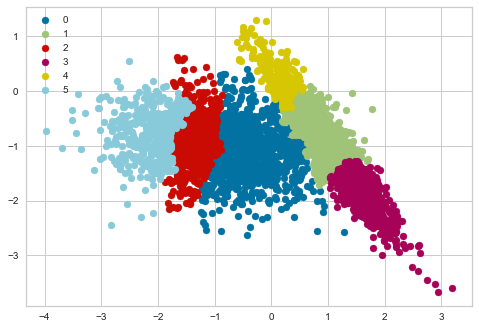

In [214]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, x_pca = make_classification(n_samples=3878, n_features=4, n_informative=2, n_redundant=2, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    #get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    #create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1],label=cluster)
    plt.legend(loc='upper left')
#show the plot
pyplot.show()

In [124]:
#labels.size

In [125]:
#print(X)

# Stability-based data structure analysis

In [126]:
segments = [[] for i in range(10)]
for k in range(2,10):
    for i in range(100):
        sample_1 = encoded_data.sample(n=1453,replace=True,random_state=100 + i)
        sample_2 = encoded_data.sample(n=1453,replace=True,random_state=i)
        AggloClustering_1 = AgglomerativeClustering(n_clusters=k).fit(sample_1)
        AggloClustering_2 = AgglomerativeClustering(n_clusters=k).fit(sample_2)
        l1 = AggloClustering_1.labels_
        l2 = AggloClustering_2.labels_
        segments[k].append(adjusted_rand_score(l1,l2))

nd_seg = np.array(segments,dtype=object)

Text(0, 0.5, 'ARI')

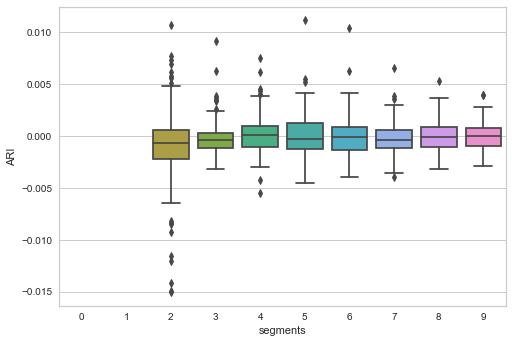

In [127]:
sns.boxplot(data = nd_seg)
plt.xlabel("segments")
plt.ylabel("ARI")

# Segmentation (Agglomerative clustering)

In [215]:
labels = model.labels_
cluster_0 = np.copy([Y[1,:]])
cluster_1 = np.copy([Y[1,:]])
cluster_2 = np.copy([Y[1,:]])
cluster_3 = np.copy([Y[1,:]])
cluster_4 = np.copy([Y[1,:]])
cluster_5 = np.copy([Y[1,:]])

for i in range(len(labels)):
    if labels[i] == 0:
        cluster_0 = np.concatenate((cluster_0,[Y[i,:]]),axis = 0)
    if labels[i] == 1:
        cluster_1 = np.concatenate((cluster_1,[Y[i,:]]),axis = 0)
    if labels[i] == 2:
        cluster_2 = np.concatenate((cluster_2,[Y[i,:]]),axis = 0)
    if labels[i] == 3:
        cluster_3 = np.concatenate((cluster_3,[Y[i,:]]),axis = 0)
    if labels[i] == 4:
        cluster_4 = np.concatenate((cluster_4,[Y[i,:]]),axis = 0)
    if labels[i] == 5:
        cluster_5 = np.concatenate((cluster_5,[Y[i,:]]),axis = 0)
        
np.delete(cluster_0, 1, 0)
np.delete(cluster_1, 1, 0)
np.delete(cluster_2, 1, 0)
np.delete(cluster_3, 1, 0)
np.delete(cluster_4, 1, 0)
np.delete(cluster_5, 1, 0)

cluster_0_pd = pd.DataFrame(data = cluster_0,columns= loadings_df.index)
cluster_1_pd = pd.DataFrame(data = cluster_1,columns= loadings_df.index)
cluster_2_pd = pd.DataFrame(data = cluster_2,columns= loadings_df.index)
cluster_3_pd = pd.DataFrame(data = cluster_3,columns= loadings_df.index)
cluster_4_pd = pd.DataFrame(data = cluster_4,columns= loadings_df.index)
cluster_5_pd = pd.DataFrame(data = cluster_5,columns= loadings_df.index)

In [216]:
labels.size

3878

In [217]:
from collections import Counter
counts = Counter(labels)

In [218]:
per =[] #percentage
for i in range(len(counts)):
    per.append(counts[i]/3878*100)
print(per)

[23.749355337802992, 29.19030428055699, 14.853017019082001, 15.21402784940691, 6.343476018566271, 10.649819494584838]


BASED ON SKILLS

After Segmentation

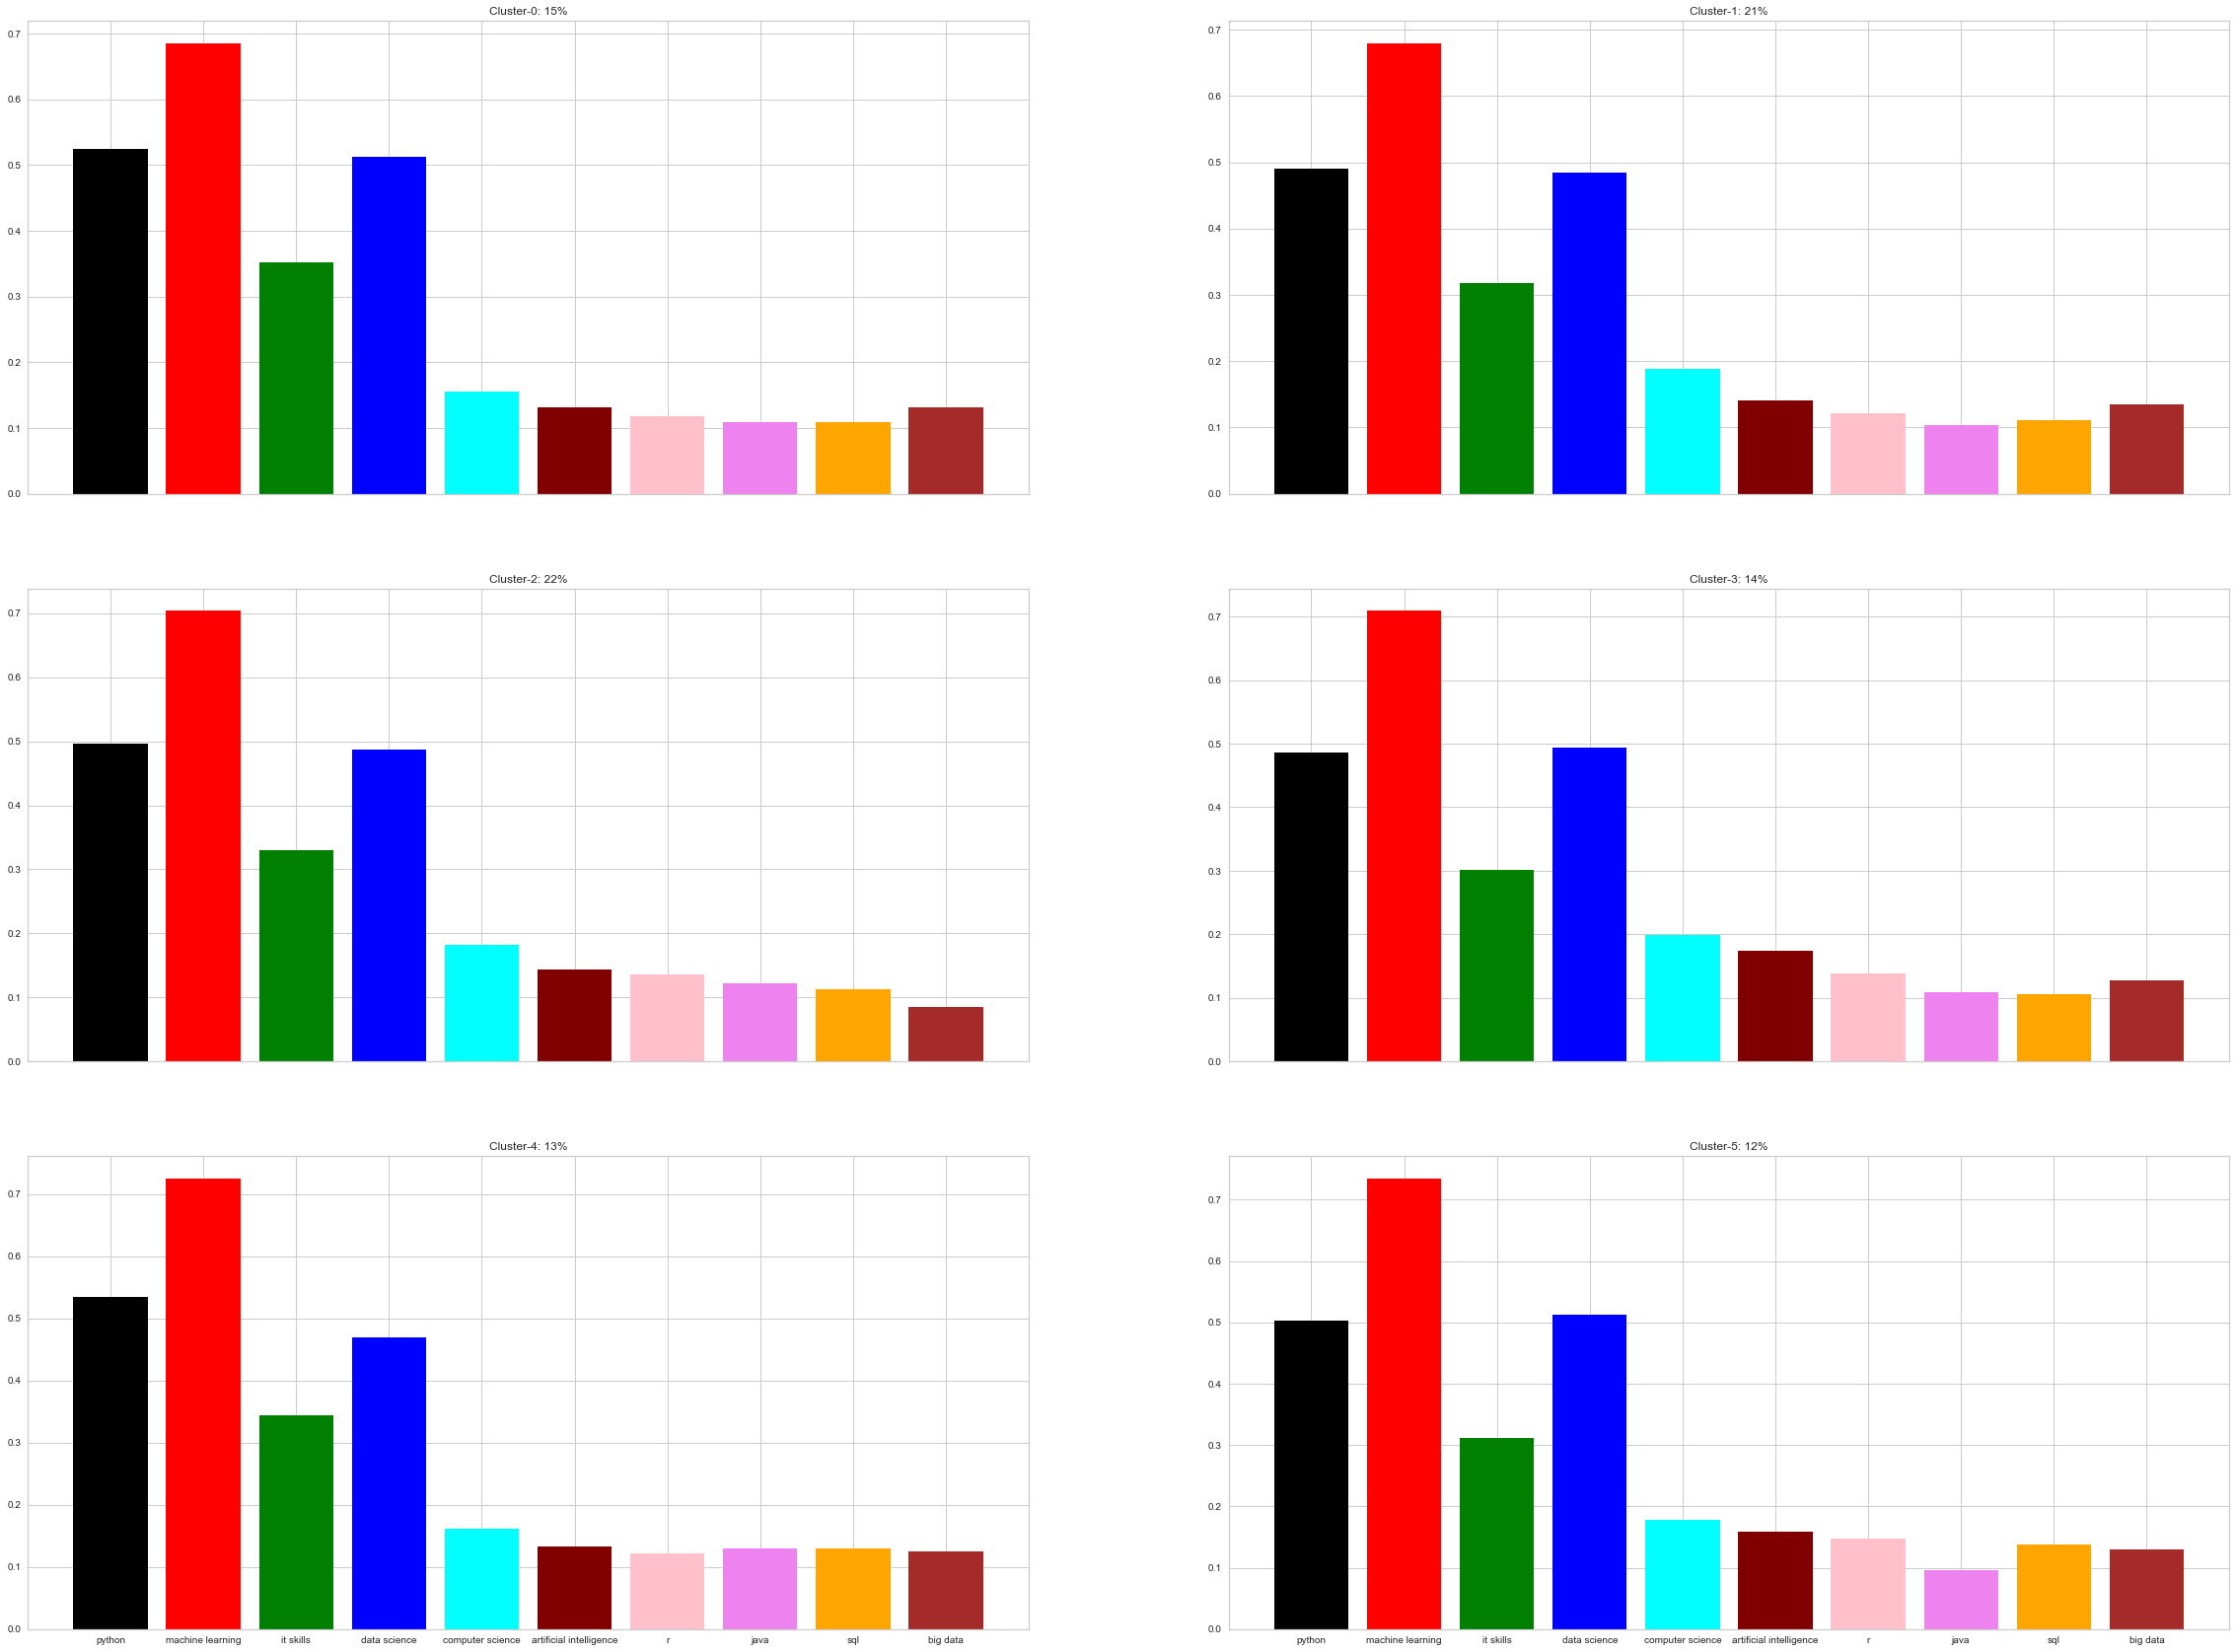

In [219]:
fig, axs = plt.subplots(3, 2, sharex=True,figsize = (40,30))

colorr = ['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow']
axs[0, 0].bar(cluster_0_pd.columns,cluster_0_pd.mean(),color = colorr)
axs[0, 1].bar(cluster_1_pd.columns,cluster_1_pd.mean(),color =colorr)
axs[1, 0].bar(cluster_2_pd.columns,cluster_2_pd.mean(),color =colorr)
axs[1, 1].bar(cluster_3_pd.columns,cluster_3_pd.mean(),color =colorr)
axs[2, 0].bar(cluster_4_pd.columns,cluster_4_pd.mean(),color =colorr)
axs[2, 1].bar(cluster_5_pd.columns,cluster_5_pd.mean(),color =colorr)




axs[0, 0].title.set_text("Cluster-0: 15%")
axs[0, 1].title.set_text("Cluster-1: 21%")
axs[1, 0].title.set_text("Cluster-2: 22%")
axs[1, 1].title.set_text("Cluster-3: 14%")
axs[2, 0].title.set_text("Cluster-4: 13%")
axs[2, 1].title.set_text("Cluster-5: 12%")


plt.show()

2. Based on Companies

In [220]:
data3['companies'].value_counts().head(10)

Huquo Consulting Pvt. Ltd    230
IBM                          100
Accenture                     91
Microsoft                     60
CarbyneTech India             44
Diverse Lynx                  34
Career Maker                  34
First Employer                32
Walmart                       32
Gojek                         25
Name: companies, dtype: int64

Before Segmentation

<AxesSubplot:>

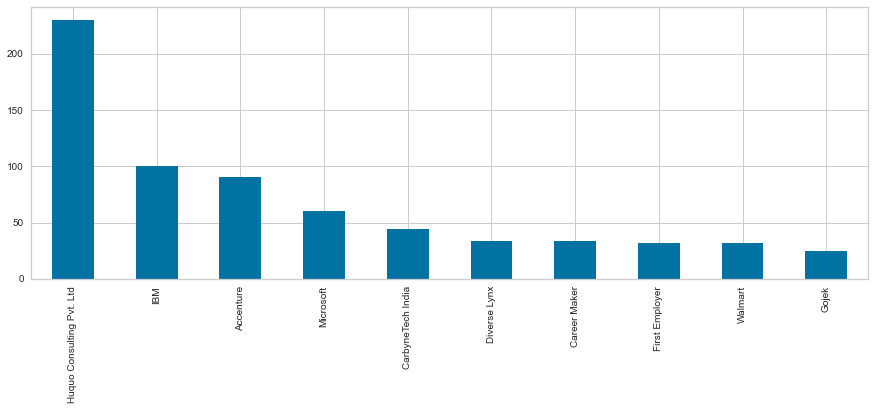

In [221]:
f,ax=plt.subplots(figsize=(15,5))
data3['companies'].value_counts().head(10).plot(kind = 'bar')

After Segmentation

Cluster 0

In [222]:
data4['labels'] = labels

<AxesSubplot:>

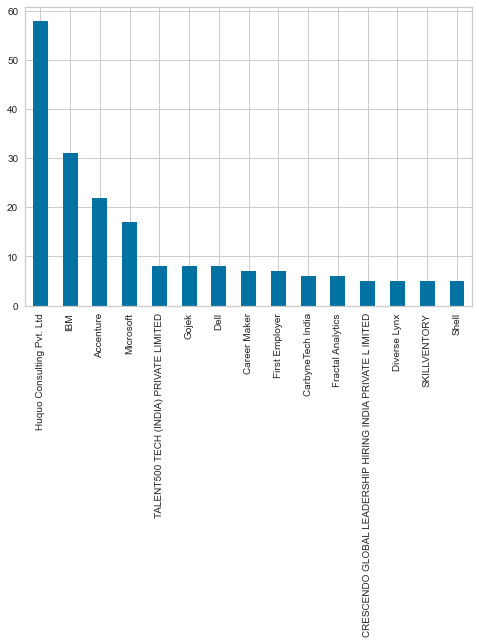

In [223]:
desired_cluster  = data4[data4['labels']==0]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

Cluster 1

<AxesSubplot:>

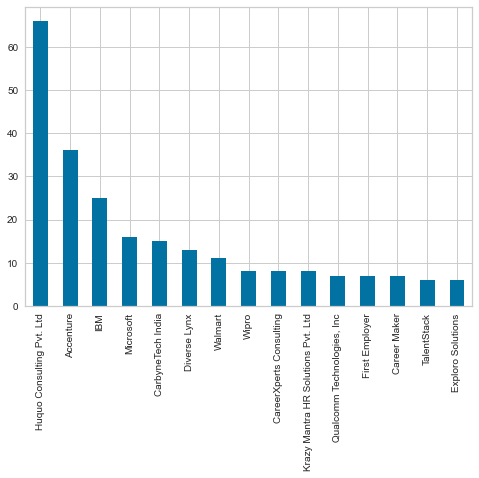

In [224]:
desired_cluster  = data4[data4['labels']==1]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

Cluster 2

<AxesSubplot:>

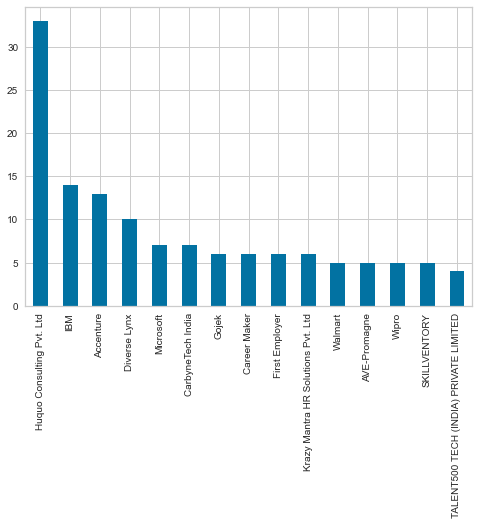

In [225]:
desired_cluster  = data4[data4['labels']==2]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

Cluster 3

<AxesSubplot:>

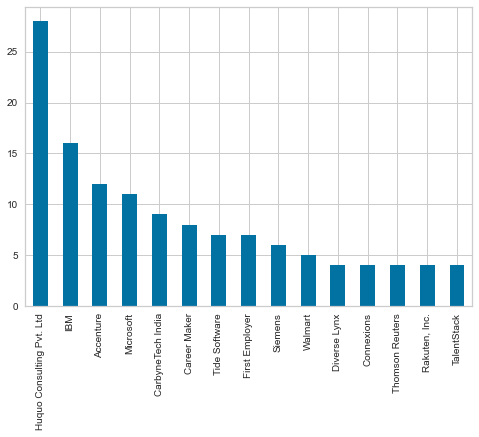

In [226]:
desired_cluster  = data4[data4['labels']==3]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

Cluster 4

<AxesSubplot:>

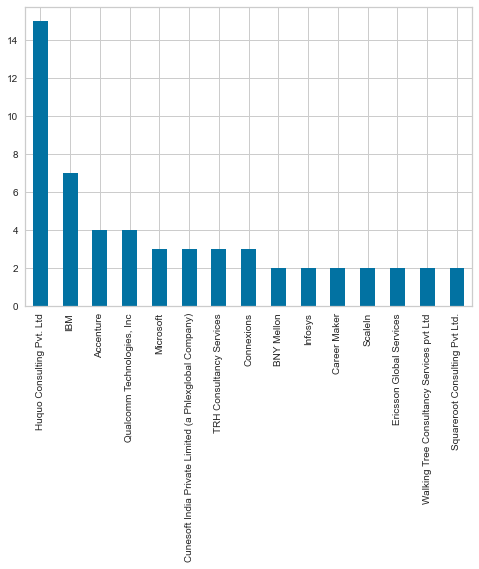

In [227]:
desired_cluster  = data4[data4['labels']==4]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

Cluster 5

<AxesSubplot:>

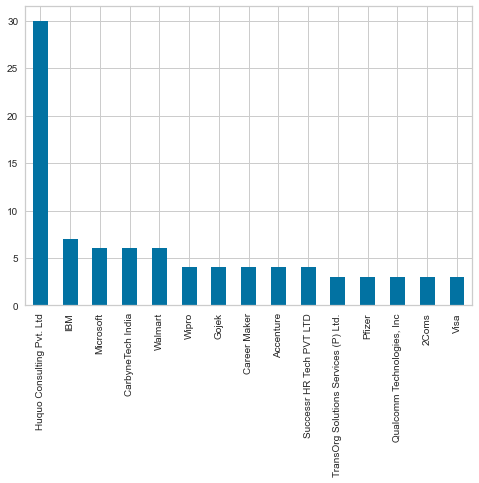

In [228]:
desired_cluster  = data4[data4['labels']==5]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

3. Based on Experience

Before Segmentation

<AxesSubplot:xlabel='companies'>

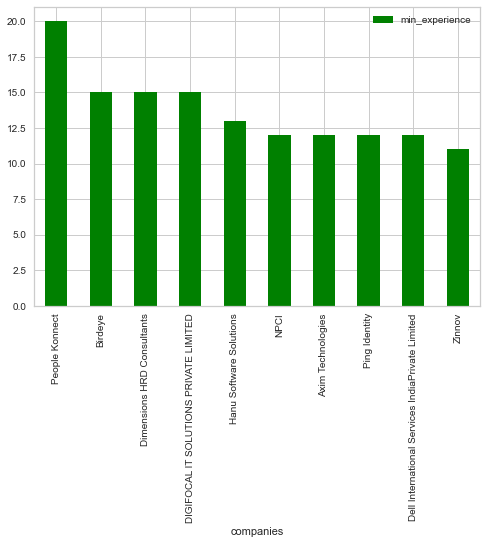

In [229]:
data4[['min_experience','companies']].groupby(["companies"]).median().sort_values(by='min_experience',ascending=False).head(10).plot.bar(color='green')

<AxesSubplot:xlabel='companies'>

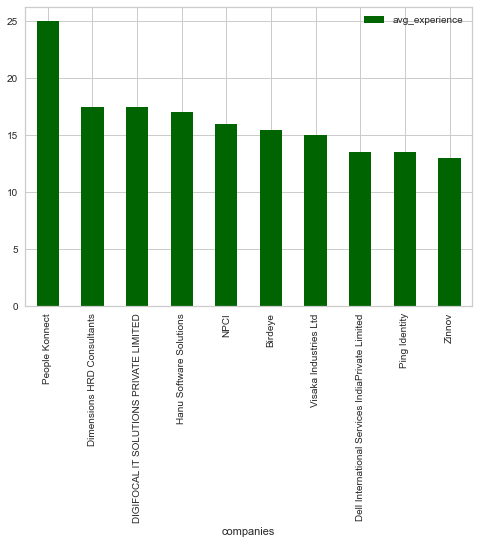

In [230]:
data4[['avg_experience','companies']].groupby(["companies"]).median().sort_values(by='avg_experience',ascending=False).head(10).plot.bar(color='darkgreen')

After Segmentation

<AxesSubplot:xlabel='companies'>

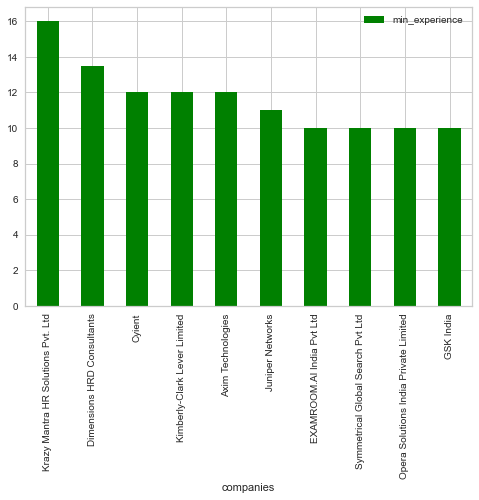

In [231]:
desired_cluster[['min_experience','companies']].groupby(["companies"]).median().sort_values(by='min_experience',ascending=False).head(10).plot.bar(color='green')

<AxesSubplot:xlabel='companies'>

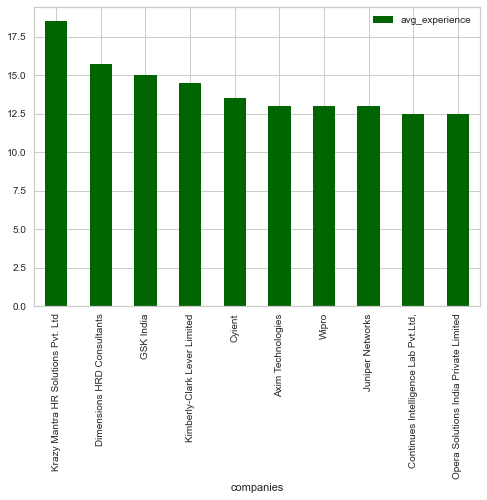

In [232]:
desired_cluster[['avg_experience','companies']].groupby(["companies"]).median().sort_values(by='avg_experience',ascending=False).head(10).plot.bar(color='darkgreen')